In [1]:
import pandas as pd
import uuid


In [2]:
df = pd.read_csv("/content/bbc-text.csv")
df = df[['text', 'category']]

print("Total articles:", len(df))
df.head()


Total articles: 2225


,text,category
0,tv future in the hands of viewers with home th...,tech
1,worldcom boss left books alone former worldc...,business
2,tigers wary of farrell gamble leicester say ...,sport
3,yeading face newcastle in fa cup premiership s...,sport
4,ocean s twelve raids box office ocean s twelve...,entertainment


In [3]:
df['article_id'] = [str(uuid.uuid4()) for _ in range(len(df))]
df.head()


,text,category,article_id
0,tv future in the hands of viewers with home th...,tech,1f6a71bc-f0c2-49ac-a7cc-ff0bcfd11cd2
1,worldcom boss left books alone former worldc...,business,925651c3-1345-4dd8-a177-2f39ca61a619
2,tigers wary of farrell gamble leicester say ...,sport,7efba7f1-aa04-41cc-8fee-073862ebd116
3,yeading face newcastle in fa cup premiership s...,sport,234cf6e6-cdf7-46ff-acc0-902b3d8b7fbf
4,ocean s twelve raids box office ocean s twelve...,entertainment,ee00acd9-6219-4ac7-9d4f-fc8e5d64f9e5


In [4]:
def chunk_text(text, chunk_size=400, overlap=50):
    words = text.split()
    chunks = []
    start = 0

    while start < len(words):
        end = start + chunk_size
        chunk_words = words[start:end]
        chunks.append(" ".join(chunk_words))
        start = end - overlap

    return chunks


In [5]:
chunks = []

for _, row in df.iterrows():
    text_chunks = chunk_text(row['text'])
    for i, chunk in enumerate(text_chunks):
        chunks.append({
            "chunk_id": i,
            "article_id": row['article_id'],
            "category": row['category'],
            "text": chunk
        })

chunks_df = pd.DataFrame(chunks)


In [6]:
print("Total chunks created:", len(chunks_df))
chunks_df.head()


Total chunks created: 3473


,chunk_id,article_id,category,text
0,0,1f6a71bc-f0c2-49ac-a7cc-ff0bcfd11cd2,tech,tv future in the hands of viewers with home th...
1,1,1f6a71bc-f0c2-49ac-a7cc-ff0bcfd11cd2,tech,brands said tim hanlon from brand communicatio...
2,2,1f6a71bc-f0c2-49ac-a7cc-ff0bcfd11cd2,tech,tivo called tivotogo which means people can pl...
3,0,925651c3-1345-4dd8-a177-2f39ca61a619,business,worldcom boss left books alone former worldcom...
4,0,7efba7f1-aa04-41cc-8fee-073862ebd116,sport,tigers wary of farrell gamble leicester say th...


In [7]:
for cat in chunks_df['category'].unique()[:3]:
    sample = chunks_df[chunks_df['category'] == cat].iloc[0]
    print(f"\nCategory: {cat}")
    print(sample['text'][:500], "...\n")



Category: tech
tv future in the hands of viewers with home theatre systems plasma high-definition tvs and digital video recorders moving into the living room the way people watch tv will be radically different in five years time. that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend programmes and other content will be delivered to viewers via home ne ...


Category: business
worldcom boss left books alone former worldcom boss bernie ebbers who is accused of overseeing an $11bn (£5.8bn) fraud never made accounting decisions a witness has told jurors. david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has alread

In [8]:
chunks_df.to_csv("bbc_news_chunks.csv", index=False)
print("Chunked dataset saved.")


Chunked dataset saved.


In [9]:
!pip install -q sentence-transformers faiss-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.8/23.8 MB 76.8 MB/s eta 0:00:00


In [10]:
import pandas as pd
import faiss
import numpy as np
from sentence_transformers import SentenceTransformer


In [11]:
chunks_df = pd.read_csv("/content/bbc_news_chunks.csv")
print("Total chunks:", len(chunks_df))
chunks_df.head()


Total chunks: 3473


,chunk_id,article_id,category,text
0,0,1f6a71bc-f0c2-49ac-a7cc-ff0bcfd11cd2,tech,tv future in the hands of viewers with home th...
1,1,1f6a71bc-f0c2-49ac-a7cc-ff0bcfd11cd2,tech,brands said tim hanlon from brand communicatio...
2,2,1f6a71bc-f0c2-49ac-a7cc-ff0bcfd11cd2,tech,tivo called tivotogo which means people can pl...
3,0,925651c3-1345-4dd8-a177-2f39ca61a619,business,worldcom boss left books alone former worldcom...
4,0,7efba7f1-aa04-41cc-8fee-073862ebd116,sport,tigers wary of farrell gamble leicester say th...


In [12]:
model = SentenceTransformer("all-MiniLM-L6-v2")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [13]:
texts = chunks_df['text'].tolist()

embeddings = model.encode(
    texts,
    show_progress_bar=True,
    convert_to_numpy=True
)

print("Embedding shape:", embeddings.shape)


Batches:   0%|          | 0/109 [00:00<?, ?it/s]

Embedding shape: (3473, 384)


In [14]:
dimension = embeddings.shape[1]
index = faiss.IndexFlatL2(dimension)

index.add(embeddings)

print("Total vectors in FAISS index:", index.ntotal)


Total vectors in FAISS index: 3473


In [15]:
def semantic_search(query, top_k=5):
    query_embedding = model.encode([query], convert_to_numpy=True)
    distances, indices = index.search(query_embedding, top_k)

    results = chunks_df.iloc[indices[0]].copy()
    results['distance'] = distances[0]

    return results


In [16]:
query = "technology advancements and innovation"
results = semantic_search(query)

results[['category', 'text']].head()


,category,text
789,tech,when invention turns to innovation it is unlik...
1105,business,developments.
790,tech,did anything you weren t quite sure if you nee...
978,tech,more power to the people says hp the digital r...
3033,tech,more power to the people says hp the digital r...


In [23]:
!pip install -q transformers accelerate sentencepiece




In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline


In [43]:
print("Total chunks available:", len(chunks_df))
chunks_df.head()

Total chunks available: 3473


,chunk_id,article_id,category,text
0,0,1f6a71bc-f0c2-49ac-a7cc-ff0bcfd11cd2,tech,tv future in the hands of viewers with home th...
1,1,1f6a71bc-f0c2-49ac-a7cc-ff0bcfd11cd2,tech,brands said tim hanlon from brand communicatio...
2,2,1f6a71bc-f0c2-49ac-a7cc-ff0bcfd11cd2,tech,tivo called tivotogo which means people can pl...
3,0,925651c3-1345-4dd8-a177-2f39ca61a619,business,worldcom boss left books alone former worldcom...
4,0,7efba7f1-aa04-41cc-8fee-073862ebd116,sport,tigers wary of farrell gamble leicester say th...


In [55]:
from sentence_transformers import SentenceTransformer

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")


Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


In [56]:
def semantic_search(query, top_k=5):
    query_embedding = embedding_model.encode(
        [query], convert_to_numpy=True
    )
    distances, indices = index.search(query_embedding, top_k)

    results = chunks_df.iloc[indices[0]].copy()
    results["distance"] = distances[0]
    return results


In [57]:
llm_model_name = "google/flan-t5-base"

llm_tokenizer = AutoTokenizer.from_pretrained(llm_model_name)
llm_model = AutoModelForSeq2SeqLM.from_pretrained(llm_model_name)

llm = pipeline(
    task="text-generation",
    model=llm_model,
    tokenizer=llm_tokenizer,
    max_new_tokens=256
)


Loading weights:   0%|          | 0/282 [00:00<?, ?it/s]

The tied weights mapping and config for this model specifies to tie shared.weight to lm_head.weight, but both are present in the checkpoints, so we will NOT tie them. You should update the config with `tie_word_embeddings=False` to silence this warning
The model 'T5ForConditionalGeneration' is not supported for text-generation. Supported models are ['PeftModelForCausalLM', 'AfmoeForCausalLM', 'ApertusForCausalLM', 'ArceeForCausalLM', 'AriaTextForCausalLM', 'BambaForCausalLM', 'BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BitNetForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'BltForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'Cohere2ForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'CwmForCausalLM', 'Data2VecTextForCausalLM', 'DbrxForCausalLM', 'DeepseekV2ForCausalLM', 'DeepseekV3ForCausalLM', 'DiffLl

In [58]:
def build_context(results, max_chunks=3, max_words=300):
    context = ""
    for _, row in results.head(max_chunks).iterrows():
        words = row["text"].split()[:max_words]
        context += " ".join(words) + "\n"
    return context


In [59]:
def generate_answer(query, context):
    prompt = f"""
Answer the question using the context below.

Context:
{context}

Question:
{query}

Answer:
"""
    response = llm(prompt)
    return response[0]["generated_text"]


In [60]:
query = "What are the main themes in technology related news?"

results = semantic_search(query, top_k=6)
context = build_context(results)

answer = generate_answer(query, context)

print("LLM Answer:\n")
print(answer)



Token indices sequence length is longer than the specified maximum sequence length for this model (771 > 512). Running this sequence through the model will result in indexing errors
Both `max_new_tokens` (=256) and `max_length`(=20) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


LLM Answer:


Answer the question using the context below.

Context:
when invention turns to innovation it is unlikely that future technological inventions are going to have the same kind of transformative impact that they did in the past. when history takes a look back at great inventions like the car and transistor they were defining technologies which ultimately changed people s lives substantially. but says nick donofrio senior vice-president of technology and manufacturing at ibm it was not the thing itself that actually improved people s lives. it was all the social and cultural changes that the discovery or invention brought with it. the car brought about a crucial change to how people lived in cities giving them the ability to move out into the suburbs whilst having mobility and access. when we talk about innovation and creating real value in the 21st century we have to think more like this but faster mr donofrio told the bbc news website after giving the royal academy of engin

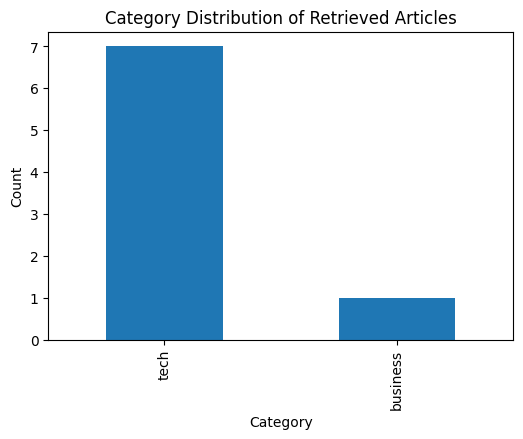

In [40]:
plt.figure(figsize=(6,4))
results["category"].value_counts().plot(kind="bar")
plt.title("Category Distribution of Retrieved Articles")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


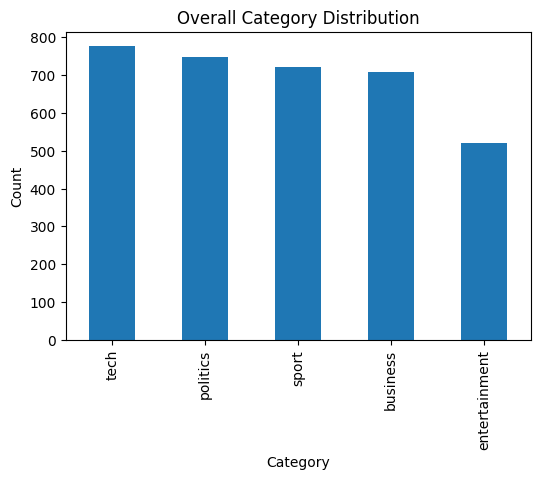

In [41]:
plt.figure(figsize=(6,4))
chunks_df["category"].value_counts().plot(kind="bar")
plt.title("Overall Category Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
